# Sentiment Analysis:
This is a sentiment analysis on social media for 100 tweets on news medial selected:
BBC,CNN,CBS,FoxNew and New York Times.The data collected were analyzed below:

In [2]:
!pip install vaderSentiment
# Import and Initialize Sentiment Analyzer

     |████████████████████████████████| 125 kB 1.6 MB/s eta 0:00:01


## Import the needed packages

In [1]:
import tweepy,json,time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

ModuleNotFoundError: No module named 'vaderSentiment'

## Getting the Twitter API Keys

In [ ]:
twitter_access_token = "966112597975150592-I6l9SD8IOj3OYmQBkOnNeRLr3lyqsrN"
twitter_access_token_secret = "HR3Eiyfh3kG16zTraLdXCtcNLMhXOdU23UH8cYfNkzRBV"
twitter_consumer_key = "rjQVbO0NyrvcuJDT91752ex11"
twitter_consumer_secret = "zufLHHrPOWN1sF8JocuB36wj4yZWscIwUGwQYkh8TYfCG9aRIG"

## Let us then configure theTweepy API Authentication

In [16]:
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Let us now specify the data sources

In [17]:
news_sources = ("@BBC", "@ctvnews", "@CNN","@FoxNews", "@dawn_com")

In [18]:
# We start extracting 100 tweets from each of the news sources
print("...STARTING..... collecting tweets from sources")

# Let us define an array to hold the sentiments
array_sentiments = []

for user in news_sources:
    count_tweet=100  # Setting the twitter count at 100
    print("Start tweets from %s"%user)
    for x in range(5):     # Extracting 5 pages of tweets
        public_tweets=api.user_timeline(user,page=x)
        # For each tweet 
        for tweet in public_tweets:
            #Calculating the compound,+ive,-ive and neutral value for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
         
            array_sentiments.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":count_tweet})
            
            count_tweet-=1

print("DONE with extracting tweets")

...STARTING..... collecting tweets from sources
Start tweets from @BBC
Start tweets from @ctvnews
Start tweets from @CNN
Start tweets from @FoxNews
Start tweets from @dawn_com
DONE with extracting tweets


## Process the data and store it.

In [19]:
# Creating a dataframe from the Sentiment Array Converting the sentiment arrary to a dataframe
sentiments_df=pd.DataFrame.from_dict(array_sentiments)
# Removing the '@' from Media column in the data frame
sentiments_df['Media'] = sentiments_df['Media'].map(lambda x: x.lstrip('@'))

# Re_arranging the order of columns before saving into CSV file
sentiments_df=sentiments_df[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]
# Storing into a CSV File\
sentiments_df.to_csv("mySentimentAnalysis.csv")

sentiments_df.head(10)




,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,BBC,Mon May 11 19:30:01 +0000 2020,"As the nation was celebrating #VEDay, the Duke...",0.8625,0.336,0.000,0.664,100
1,BBC,Mon May 11 18:01:00 +0000 2020,This week's #Hospital: Coronavirus Specials we...,0.0000,0.000,0.000,1.000,99
2,BBC,Mon May 11 16:01:00 +0000 2020,This Dutch care home has found a way to bring ...,0.4939,0.138,0.000,0.862,98
3,BBC,Mon May 11 14:25:30 +0000 2020,RT @BBCTheOneShow: Have you heard the news?📢\n...,0.0000,0.000,0.000,1.000,97
4,BBC,Mon May 11 12:01:00 +0000 2020,World War Two veteran Alec and wife Gladys got...,-0.6249,0.121,0.256,0.623,96
5,BBC,Mon May 11 10:01:00 +0000 2020,Brand new #JamieJohnson is streaming now on @b...,0.0000,0.000,0.000,1.000,95
6,BBC,Mon May 11 09:12:00 +0000 2020,#LifeDrawingLive is back!\n \nAll you'll need ...,0.3595,0.116,0.000,0.884,94
7,BBC,Sun May 10 19:01:00 +0000 2020,#TheRanganation is back for a brand new series...,0.5400,0.155,0.000,0.845,93
8,BBC,Sun May 10 13:04:09 +0000 2020,#HealthCheckUKLive | Weekdays | 10am | @bbcone...,0.0000,0.000,0.000,1.000,92
9,BBC,Sun May 10 13:01:00 +0000 2020,Water? 💧Coffee? ☕️Orange juice? 🍊 Milk? 🥛\n\nW...,0.8053,0.240,0.000,0.760,91


In [23]:
# Creating an array with the unique Media sources in the data frame
source=sentiments_df["Media"].unique()

## Visualization for media sources

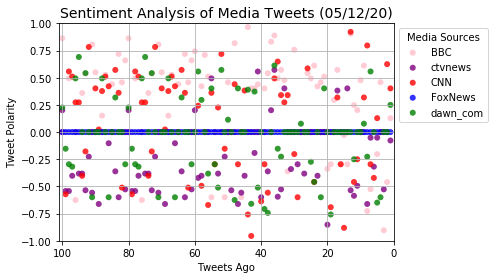

In [21]:
for media in source:
    mydf=sentiments_df[sentiments_df["Media"]==media]
    plt.scatter(mydf["Tweets Ago"],mydf["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=mydf.Media.map({"BBC": "pink", "ctvnews" : "purple",  "CNN": 'red',
                                              "FoxNews":"blue","dawn_com":"green"}))

plt.legend(bbox_to_anchor = (1,1),title="Media Sources")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(101,0)
plt.ylim(-1,1)
plt.grid(True)
plt.savefig("Output/Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
plt.show()

## Calculating the summary statistics

In [22]:
# Calculating the mean for each Media channel and storing to a dataframe
means_media_trends=sentiments_df.groupby("Media").mean()["Compound"].to_frame()
#Resetting the index 
means_media_trends.reset_index(inplace=True)

means_media_trends


,Media,Compound
0,BBC,0.234137
1,CNN,0.057011
2,FoxNews,0.000000
3,ctvnews,-0.194618
4,dawn_com,-0.025389
